In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor



In [71]:
df = pd.read_csv(r"C:\Users\parth\Documents\COLLEGE WORKS\DAI-101\Practice Problems\tips (data for regression problem).csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [72]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [73]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Plotting Scatter Plots to get an idea of correlation 

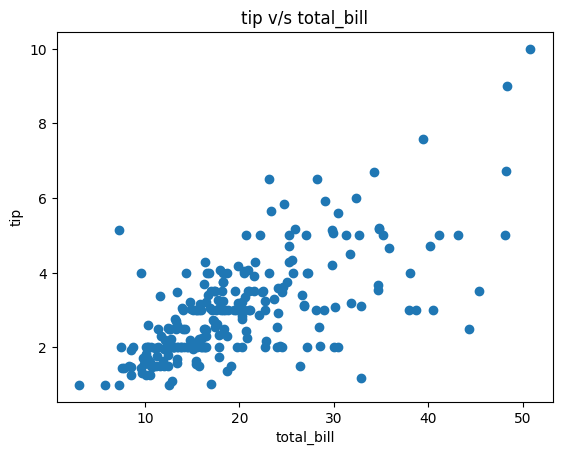

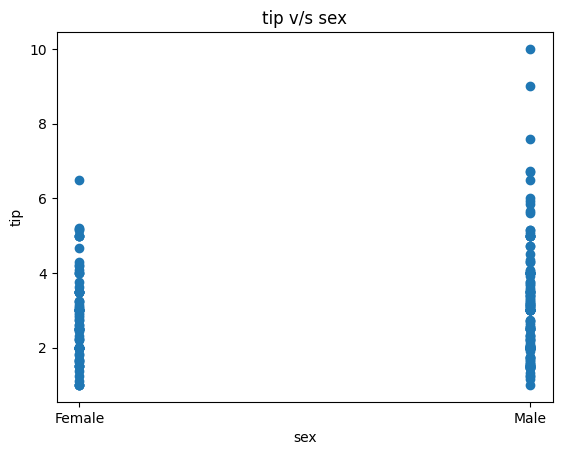

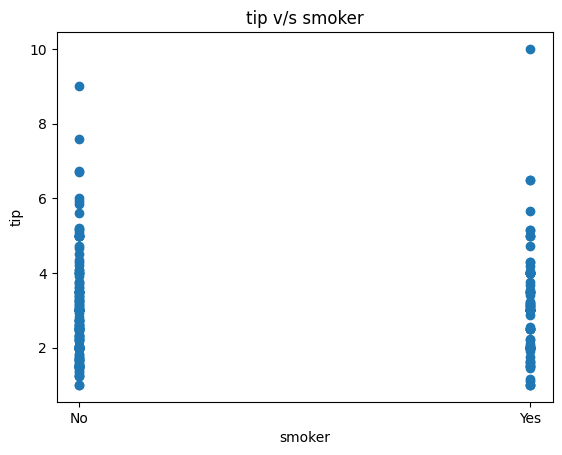

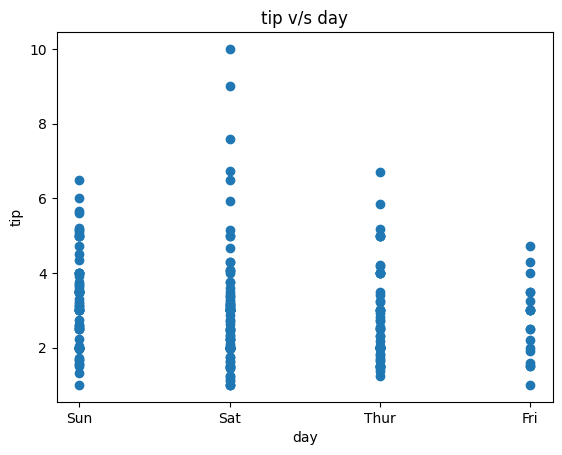

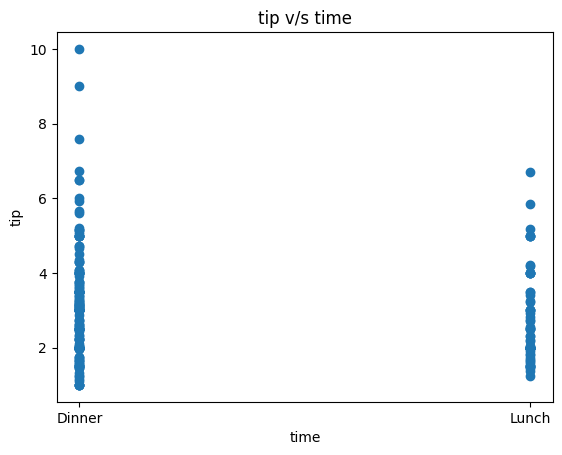

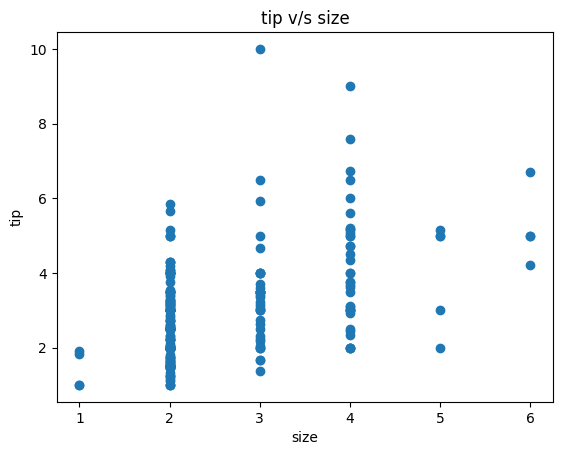

In [74]:
for i in range(0,df.shape[1]):
    if i==1:
        continue
    plt.scatter(x=df.iloc[:,i], y=df['tip'])
    plt.xlabel(df.columns[i])
    plt.ylabel('tip')
    plt.title("tip v/s " + df.columns[i])
    plt.show()

Performing T-test along with finding Correlation to get a clear picture of the dependency of tip.

In [75]:
group_A = df[df['sex']=='Male']['tip']
group_B = df[df['sex']=='Female']['tip']
group_C = df[df['smoker']=='No']['tip']
group_D = df[df['smoker']=='Yes']['tip']
group_E = df[df['day']=='Sun']['tip']
group_F = df[df['day']=='Sat']['tip']
group_G = df[df['day']=='Thur']['tip']
group_H = df[df['day']=='Fri']['tip']
group_I = df[df['time']=='Dinner']['tip']
group_J = df[df['time']=='Lunch']['tip']

t_stat_1, p_value_1 = ttest_ind(group_A, group_B)
t_stat_2, p_value_2 = ttest_ind(group_C, group_D)
f_stat, p_value_3 = stats.f_oneway(group_A, group_B, group_C,group_D)
t_stat_4, p_value_4 = ttest_ind(group_I, group_J)


print("The correlation between total bill and tip : ", df['tip'].corr(df['total_bill']))
print("The correlation between size and tip : ", df['tip'].corr(df['size']))
print("p-value for t-test between sex and tip : ", p_value_1)
print("p-value for t-test between smoker and tip : ", p_value_2)
print("p-value for t-test between day and tip : ", p_value_3)
print("p-value for t-test between time and tip : ", p_value_4)


The correlation between total bill and tip :  0.6757341092113643
The correlation between size and tip :  0.48929877523035786
p-value for t-test between sex and tip :  0.16645623503456755
p-value for t-test between smoker and tip :  0.9265931522244976
p-value for t-test between day and tip :  0.588065116366763
p-value for t-test between time and tip :  0.05780153475171558


From the values of correlation coefficient and p-value we can say that:
1) Tip amount increases with total bill.
2) Tip amount increases with size
3) P-value for sex, smoker, day are more than 0.05 so there is no statistical significance between these attributes and tip.
4) P-value for time and tip distribution is around 0.05 so we may there is some relation between these two.

Hence, tip depends upon total bill, size, time.

In [76]:
df_en = df.drop(columns=['sex', 'smoker', 'day', 'time'])
df_en['time_encoded']=np.where(df['time']=='Lunch',0,1)
df_en['sex_encoded']=np.where(df['sex']=='Female',0,1)
df_en['smoker_encoded']=np.where(df['smoker']=='No',0,1)
day_mapping = {'Sun': 0,'Thur': 1,'Fri': 2,'Sat' : 3}
df_en['day_encoded'] = df['day'].map(day_mapping)

In [77]:
df_en.head()

,total_bill,tip,size,time_encoded,sex_encoded,smoker_encoded,day_encoded
0,16.99,1.01,2,1,0,0,0
1,10.34,1.66,3,1,1,0,0
2,21.01,3.50,3,1,1,0,0
3,23.68,3.31,2,1,1,0,0
4,24.59,3.61,4,1,0,0,0


Finding the order of dependency of tip with all factors

<Axes: >

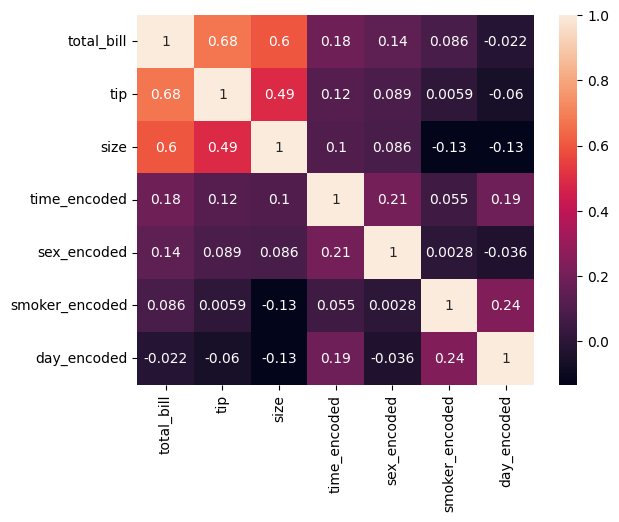

In [ ]:
corr_matrix = df_en.corr()

sns.heatmap(corr_matrix,annot=True)

Pair Plot

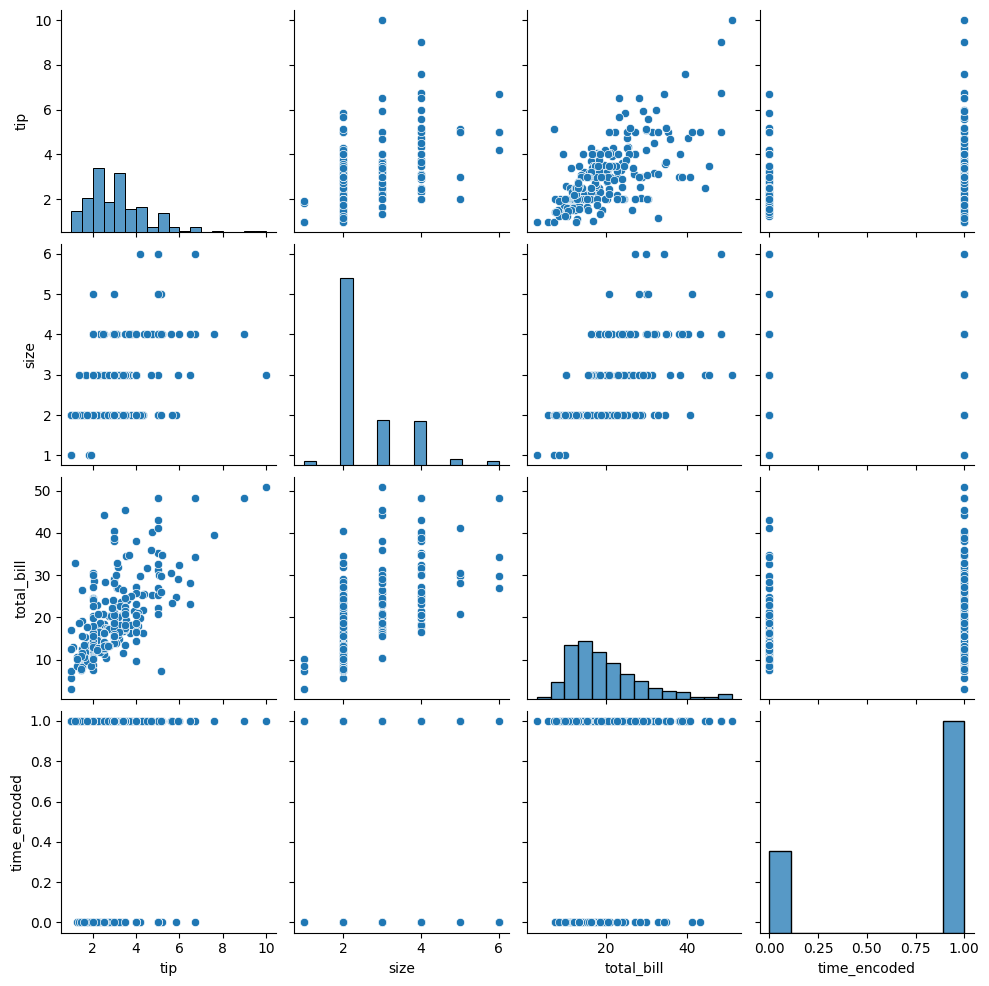

In [82]:
sns.pairplot(df_en[['tip','size','total_bill','time_encoded']])

Rainbow Test

In [84]:
X = df_en.drop(columns=['tip'])           #Independent variable
Y = df['tip']                   #Dependent variable

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

rainbow_stat, p_value = linear_rainbow(model)
print("Rainbow statistic :", rainbow_stat)
print("P-value :", p_value)

Rainbow statistic : 1.2050845652627247
P-value : 0.15641114591299765


Since this p-value is greater than 0.05, there is not enough evidence to reject the null hypothesis. This means the data does not show significant non-linearity, and a linear model may be suitable for your data.

Text(0, 0.5, 'Average Tip')

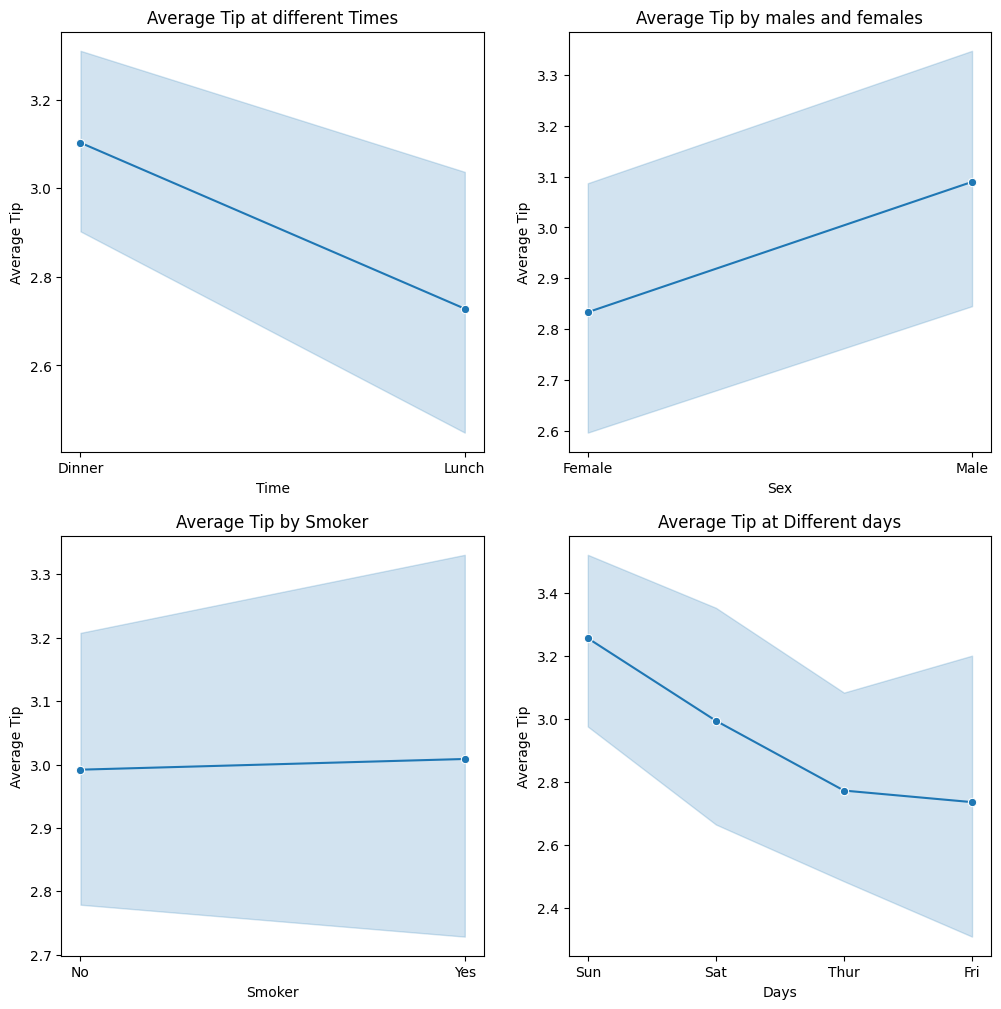

In [111]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.lineplot(x=df.time, y=df.tip, estimator="mean", marker='o')
plt.title("Average Tip at different Times")
plt.xlabel("Time")
plt.ylabel("Average Tip")

plt.subplot(2,2,2)
sns.lineplot(x=df.sex, y=df.tip, estimator="mean", marker='o')
plt.title("Average Tip by males and females")
plt.xlabel("Sex")
plt.ylabel("Average Tip")

plt.subplot(2,2,3)
sns.lineplot(x=df.smoker, y=df.tip, estimator="mean", marker='o')
plt.title("Average Tip by Smoker")
plt.xlabel("Smoker")
plt.ylabel("Average Tip")

plt.subplot(2,2,4)
sns.lineplot(x=df.day, y=df.tip, estimator="mean", marker='o')
plt.title("Average Tip at Different days")
plt.xlabel("Days")
plt.ylabel("Average Tip")

From the above graphs we can conclude that:

1) More Tip is given at Dinner time.
2) More Tips are given by Males.
3) Smokers and Non-Smokers give same amount of tip.
4) High tips are given on Sunday then Saturday then Thursday and Friday 

Model Training

In [121]:
encoded = pd.get_dummies(df)

X = encoded.drop('tip', axis=1)
Y = encoded['tip']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Linear Regression

In [155]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(x_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = root_mean_squared_error(y_test, y_pred_linear)
print("Mean Squared Error :", mse_linear, "\nR2 Score :", r2_linear, "\nRoot Mean Squared Error :", rmse_linear)

Mean Squared Error : 0.7033566017436101 
R2 Score : 0.43730181943482527 
Root Mean Squared Error : 0.8386635807900628


Ridge Regression

In [156]:
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(x_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(x_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = root_mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error :", mse_ridge, "\nR2 Score :", r2_ridge, "\nRoot Mean Squared Error :", rmse_ridge)

Mean Squared Error : 0.7031922829677626 
R2 Score : 0.4374332774690186 
Root Mean Squared Error : 0.8385656104132595


Lasso Regression

In [157]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(x_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = root_mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error :", mse_lasso, "\nR2 Score :", r2_lasso, "\nRoot Mean Squared Error :", rmse_lasso)

Mean Squared Error : 0.5908528649971524 
R2 Score : 0.5273068720881755 
Root Mean Squared Error : 0.768669542129225


Decision Tree Regression

In [158]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(x_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = root_mean_squared_error(y_test, y_pred_tree)
print("Mean Squared Error :", mse_tree, "\nR2 Score :", r2_tree, "\nRoot Mean Squared Error :", rmse_tree)

Mean Squared Error : 1.391881632653061 
R2 Score : -0.11353083246023243 
Root Mean Squared Error : 1.17978033237254


Random Forest Regression (Ensemble Method)

In [159]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(x_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(x_test)

mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
rmse_forest = root_mean_squared_error(y_test, y_pred_forest)
print("Mean Squared Error :", mse_forest, "\nR2 Score :", r2_forest, "\nRoot Mean Squared Error :", rmse_forest)

Mean Squared Error : 0.9367495810204092 
R2 Score : 0.25058315571548884 
Root Mean Squared Error : 0.9678582442798166


Support Vector Regression

In [160]:
SV_reg = SVR(kernel = 'linear')
SV_reg.fit(x_train, y_train)

# Predictions
y_pred_SVR = SV_reg.predict(x_test)

mse_SVR = mean_squared_error(y_test, y_pred_SVR)
r2_SVR = r2_score(y_test, y_pred_SVR)
rmse_SVR = root_mean_squared_error(y_test, y_pred_SVR)
print("Mean Squared Error :", mse_SVR, "\nR2 Score :", r2_SVR, "\nRoot Mean Squared Error :", rmse_SVR)

Mean Squared Error : 0.6532063691987343 
R2 Score : 0.4774229251981983 
Root Mean Squared Error : 0.8082118343594916


KNN Regression

In [161]:
KNN_reg = KNeighborsRegressor(n_neighbors=5)
KNN_reg.fit(x_train, y_train)

# Predictions
y_pred_KNN = KNN_reg.predict(x_test)

mse_KNN = mean_squared_error(y_test, y_pred_KNN)
r2_KNN = r2_score(y_test, y_pred_KNN)
rmse_KNN = root_mean_squared_error(y_test, y_pred_KNN)
print("Mean Squared Error :", mse_KNN, "\nR2 Score :", r2_KNN, "\nRoot Mean Squared Error :", rmse_KNN)

Mean Squared Error : 0.874114367346939 
R2 Score : 0.30069247534937227 
Root Mean Squared Error : 0.9349408362816007


Residual Plots

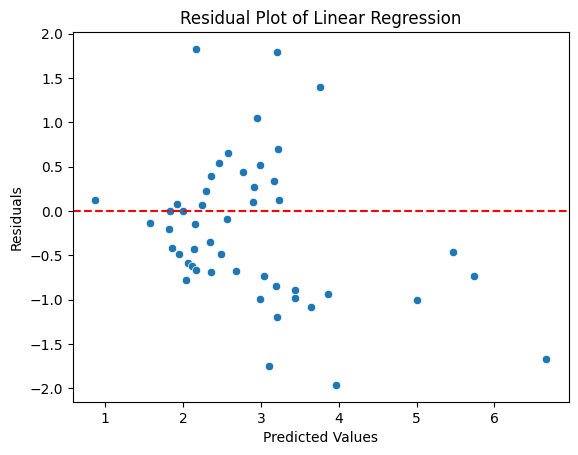

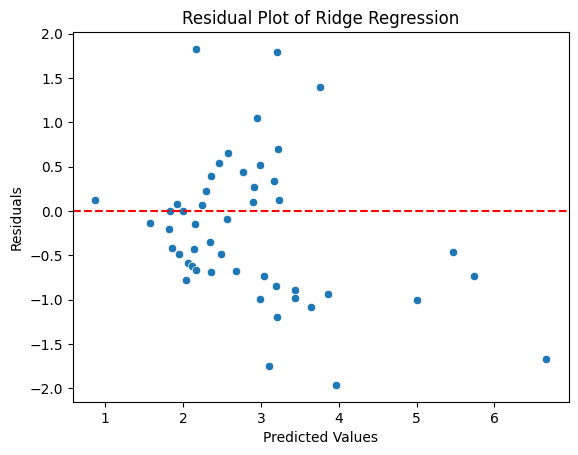

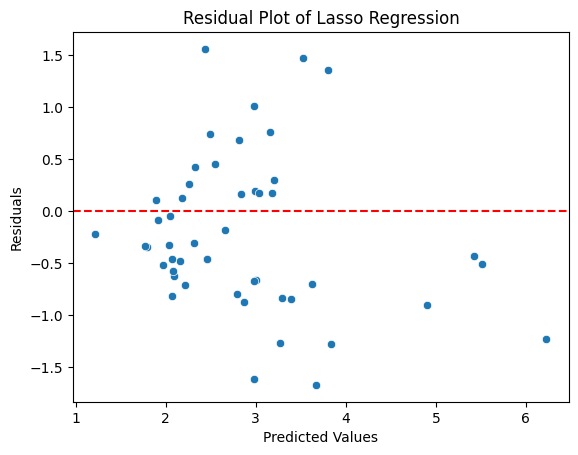

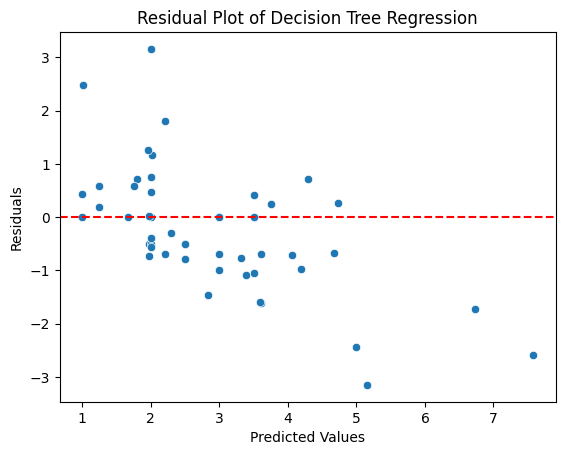

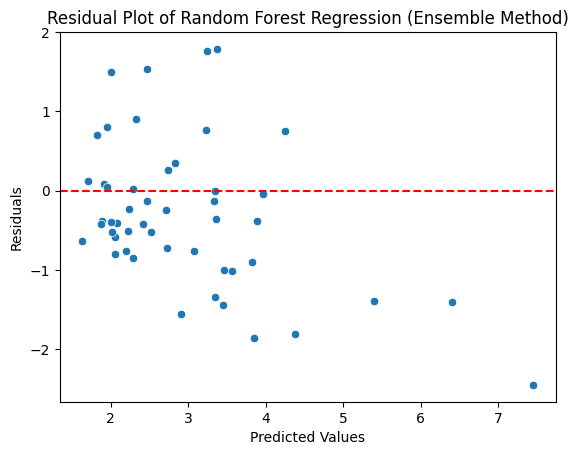

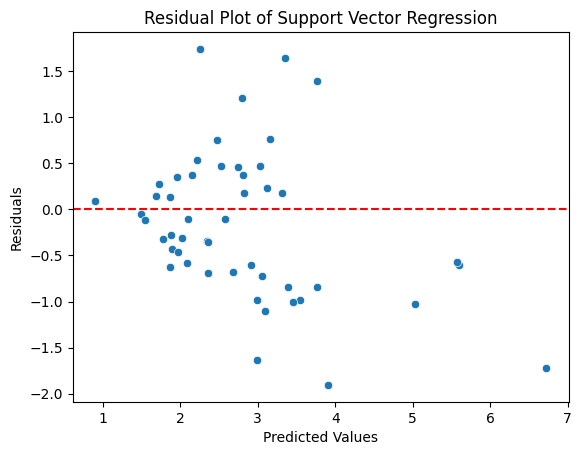

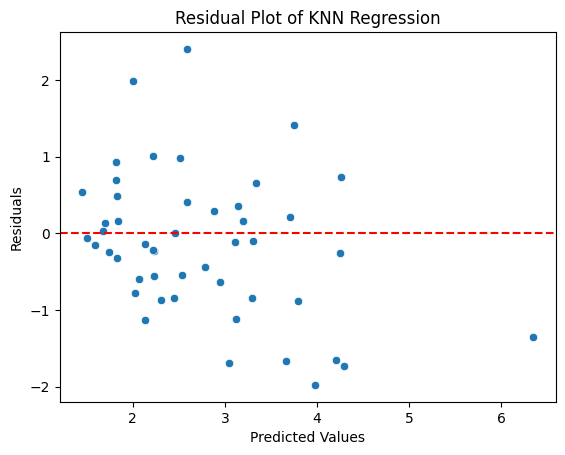

In [182]:
def plot (y_test, y_pred, reg):
    residual = y_test - y_pred
    sns.scatterplot(x=y_pred, y=residual)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot of " + reg)
    plt.show()

models = ['Linear Regression','Ridge Regression','Lasso Regression','Decision Tree Regression','Random Forest Regression (Ensemble Method)','Support Vector Regression','KNN Regression']
y_prediction = [y_pred_linear,y_pred_ridge,y_pred_lasso,y_pred_tree,y_pred_forest,y_pred_SVR,y_pred_KNN]

for i in range(len(models)):
    plot(y_test, y_prediction[i], models[i])

According to analysis insights to improve customer service strategies and revenue management.: 

1) More Tip is given at Dinner time. So,we should maintain or try to increase the customer services to increase the tip amount at night.
2) Also, to increase tips at lunch, we should increase customer services and also food items to attract more people.
3) More Tips are given by size of two family, So we can try to increase more tables which could accomodate the family size of 2.
4) High tips are given on Sunday then Saturday then Thursday and Friday. So, we can provide offers on other day to attract more people on odd days.